## Import Libraries and Read Data

In [16]:
import pandas as pd
import matplotlib as m
import matplotlib.pyplot as plt

file = '../2024_nwsl_0525.csv'
df = pd.read_csv(file)

## Data Exploration

In [17]:
df.head()

,team,player_name,conc_player_name,position,games_played,games_started,minutes_played,goals,accurate_pass_percentage,assists,...,successful_dribble,dribble_percentage,goals_and_assists,tackles.1,tackles_percentage,interceptions,headed_duel,gk_saves,gk_long_ball_percentage,gk_total_clearance
0,Orlando Pride,Kerry Abello,KERRYABELLO,DEFENDER,11,11.0,927,0,81,1,...,12,52,1,13,45,10,5,NaN,NaN,NaN
1,Seattle Reign,Emeri Adames,EMERIADAMES,FORWARD,11,3.0,273,1,75,0,...,3,20,1,3,60,3,7,NaN,NaN,NaN
2,Orlando Pride,Adriana,ADRIANA,FORWARD,9,7.0,641,1,76,1,...,11,41,2,2,50,5,4,NaN,NaN,NaN
3,San Diego Wave FC,Amirah Ali,AMIRAHALI,FORWARD,5,1.0,114,0,63,0,...,1,33,0,2,67,1,2,NaN,NaN,NaN
4,Orlando Pride,Amanda Allen,AMANDAALLEN,FORWARD,7,NaN,81,0,70,1,...,3,60,1,3,60,0,0,NaN,NaN,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   team                          343 non-null    object 
 1   player_name                   344 non-null    object 
 2   conc_player_name              344 non-null    object 
 3   position                      343 non-null    object 
 4   games_played                  344 non-null    int64  
 5   games_started                 261 non-null    float64
 6   minutes_played                344 non-null    int64  
 7   goals                         344 non-null    int64  
 8   accurate_pass_percentage      344 non-null    int64  
 9   assists                       344 non-null    int64  
 10  total_scoring_attempts        344 non-null    int64  
 11  on_target_scoring_attempts    344 non-null    int64  
 12  total_attacking_assists       344 non-null    int64  
 13  tackl

In [19]:
# Count the occurrences of each value in the 'position' column
value_counts = df['position'].value_counts()

print(value_counts)

MIDFIELDER    108
DEFENDER      100
FORWARD        96
GOALKEEPER     39
Name: position, dtype: int64


## Create a new dataframe for Forwards
I'm interested in exploring what factors are correlated with a forward scoring a goal. For example, if more minutes played, more passes, or more successful dribbles mean the player is more likely to score a goal.

So we'll explore the data and see if there's any trends.

In [20]:
forwards = df[df['position'] == 'FORWARD']
forwards.head()

,team,player_name,conc_player_name,position,games_played,games_started,minutes_played,goals,accurate_pass_percentage,assists,...,successful_dribble,dribble_percentage,goals_and_assists,tackles.1,tackles_percentage,interceptions,headed_duel,gk_saves,gk_long_ball_percentage,gk_total_clearance
1,Seattle Reign,Emeri Adames,EMERIADAMES,FORWARD,11,3.0,273,1,75,0,...,3,20,1,3,60,3,7,NaN,NaN,NaN
2,Orlando Pride,Adriana,ADRIANA,FORWARD,9,7.0,641,1,76,1,...,11,41,2,2,50,5,4,NaN,NaN,NaN
3,San Diego Wave FC,Amirah Ali,AMIRAHALI,FORWARD,5,1.0,114,0,63,0,...,1,33,0,2,67,1,2,NaN,NaN,NaN
4,Orlando Pride,Amanda Allen,AMANDAALLEN,FORWARD,7,NaN,81,0,70,1,...,3,60,1,3,60,0,0,NaN,NaN,NaN
6,Houston Dash,Michelle Alozie,MICHELLEALOZIE,FORWARD,10,5.0,480,0,65,1,...,3,25,1,3,50,2,22,NaN,NaN,NaN


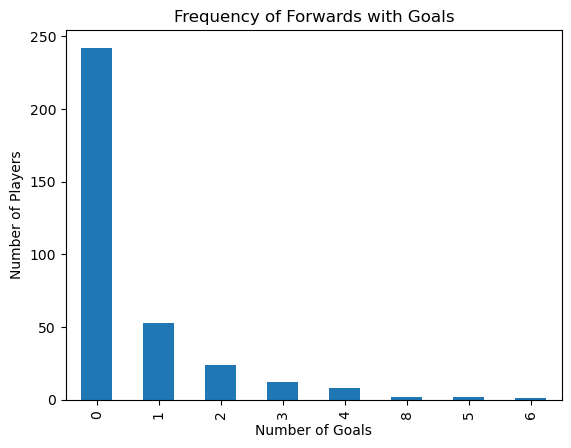

In [21]:
# Count the occurrences of each value in the 'position' column
goal_frequency = df['goals'].value_counts()

goal_frequency.plot(kind='bar')
plt.title('Frequency of Forwards with Goals')
plt.xlabel('Number of Goals')
plt.ylabel('Number of Players')
plt.show()

It seems like there are a lot of forwards with zero goals, many with 1 or 2, and then a drop off beyond 3.

Let's try a scatter plot showing goals vs. minutes played, number of passes, and successful dribbles.

Text(0, 0.5, 'Minutes Played')

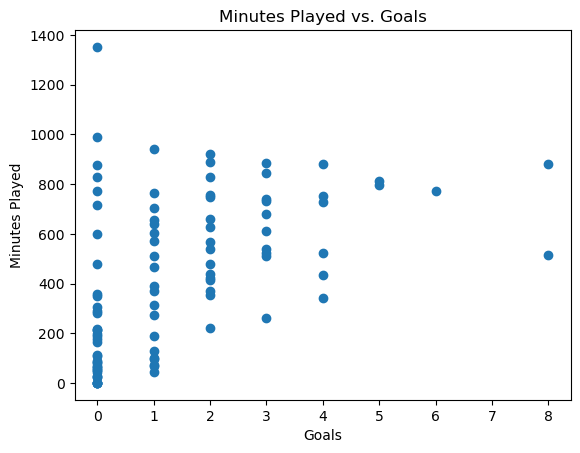

In [22]:
plt.scatter(forwards['goals'], forwards['minutes_played'])
plt.title('Minutes Played vs. Goals')
plt.xlabel('Goals')
plt.ylabel('Minutes Played')

### Insight #1:
It looks like for players scoring 2 or more goals, they've generally played between 200 and 1000 minutes. For simplicity I'll use 200+ minutes, since it looks like there's maybe only 1 outlier above 1000 minutes.

Text(0, 0.5, 'Total Passes')

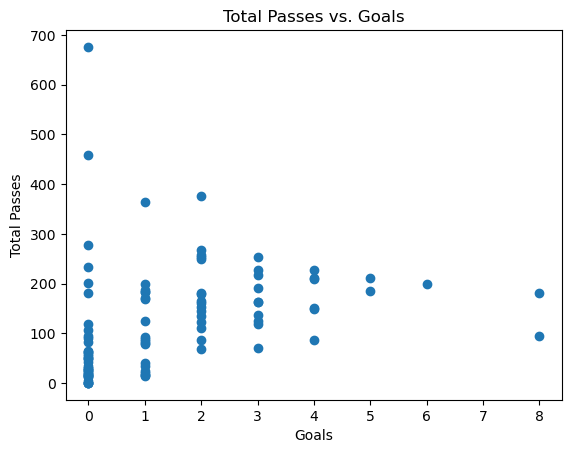

In [23]:
plt.scatter(forwards['goals'], forwards['total_passes'])
plt.title('Total Passes vs. Goals')
plt.xlabel('Goals')
plt.ylabel('Total Passes')

### Insight #2:
It looks like for players scoring 2 or more goals, they've made at least ~50 passes. Since there are only ~4 players below the 100 mark, we could probably generalize our decision tree to say players who scored 2+ goals made at least 100 passes.

Text(0, 0.5, 'Accurate Pass %')

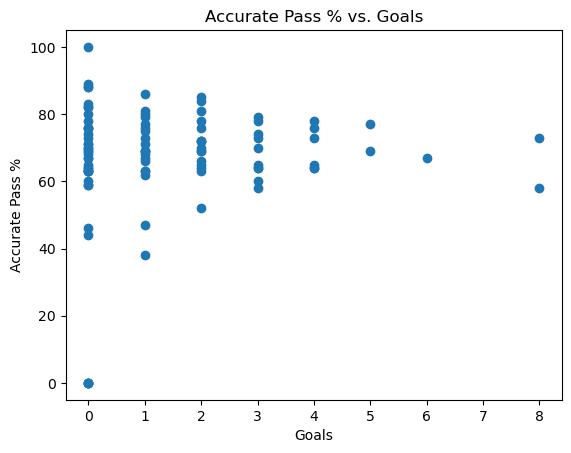

In [24]:
plt.scatter(forwards['goals'], forwards['accurate_pass_percentage'])
plt.title('Accurate Pass % vs. Goals')
plt.xlabel('Goals')
plt.ylabel('Accurate Pass %')

I'm not seeing much of a trend here, passing accuracy seems fairly consistent across forwards who have scored any amount of goals.

Text(0, 0.5, 'Games Played')

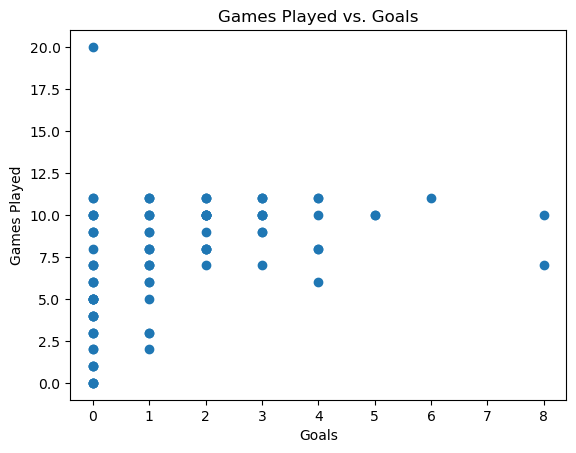

In [25]:
plt.scatter(forwards['goals'], forwards['games_played'])
plt.title('Games Played vs. Goals')
plt.xlabel('Goals')
plt.ylabel('Games Played')

## Insight #3:
It looks like for players with 2+ goals, they generally have played at least 7 games.

## Summary and Next Steps
By exploring this data, we found that players with 2+ goals generally: 
- Played at least 200 minutes
- Played at least 7 games
- Made at least 50 passes

Using this information, we'll create a decision tree in c++ which will test this theory: Whether or not getting significant playing time, in multiple (7+) games, and being involved in possession of at least 50 passes, are important to scoring more goals.

We'll do this by splitting this data into psuedo- "training" and "test" data (although we're not actually training the decision tree model).

#### _STOP HERE AND RUN THE DATA THROUGH THE C++ DECISION TREE :)_

## Testing our predictions
We have now run the player data through the decision tree, and developed predictions of whether a player scored 2+ goals during the season. 

Now we'll do a quick calculation to check how accurate the decision tree was.

In [26]:
# Read the prediction file into a DataFrames
predictions = pd.read_csv('../predictions.csv')

# Merge the DataFrames based on the common column 'id'
merged_df = pd.merge(df, predictions, on='player_name')

# Display the merged DataFrame
merged_df.head()

,team,player_name,conc_player_name,position,games_played,games_started,minutes_played,goals,accurate_pass_percentage,assists,...,dribble_percentage,goals_and_assists,tackles.1,tackles_percentage,interceptions,headed_duel,gk_saves,gk_long_ball_percentage,gk_total_clearance,prediction
0,Orlando Pride,Kerry Abello,KERRYABELLO,DEFENDER,11,11.0,927,0,81,1,...,52,1,13,45,10,5,NaN,NaN,NaN,1
1,Seattle Reign,Emeri Adames,EMERIADAMES,FORWARD,11,3.0,273,1,75,0,...,20,1,3,60,3,7,NaN,NaN,NaN,1
2,Orlando Pride,Adriana,ADRIANA,FORWARD,9,7.0,641,1,76,1,...,41,2,2,50,5,4,NaN,NaN,NaN,1
3,San Diego Wave FC,Amirah Ali,AMIRAHALI,FORWARD,5,1.0,114,0,63,0,...,33,0,2,67,1,2,NaN,NaN,NaN,0
4,Orlando Pride,Amanda Allen,AMANDAALLEN,FORWARD,7,NaN,81,0,70,1,...,60,1,3,60,0,0,NaN,NaN,NaN,0


In [27]:
# filter to only forwards
filtered_forwards = merged_df[merged_df['position'] == 'FORWARD']

In [29]:
# define the conditions we'll use to count number of correct and incorrect predictions
predicted_true = (filtered_forwards[' prediction'] == 1)
more_than_2_goals = (filtered_forwards['goals'] >= 2)

# Count number of correct/incorrect predictions
correct_predictions = filtered_forwards[more_than_2_goals & predicted_true].shape[0] + filtered_forwards[~more_than_2_goals & ~predicted_true].shape[0]
incorrect_predictions = filtered_forwards[~more_than_2_goals & predicted_true].shape[0] + filtered_forwards[more_than_2_goals & ~predicted_true].shape[0]
total = correct_predictions + incorrect_predictions

# Print the count
print('Number correct: ' + str(correct_predictions))
print('Number incorrect: ' + str(incorrect_predictions))
print('Percent correct: ' + str(correct_predictions/total*100) + '%')

Number correct: 72
Number incorrect: 24
Percent correct: 75.0%
